In [1]:
# Multiple Linear Regression

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Key Components of a Dataset in Scikit-learn
data: Contains the numerical feature values for all samples.
<br>Shape: (n_samples, n_features).
<br>target: Contains the labels or target variable (dependent variable). For classification datasets, this corresponds to class labels.
<br>feature_names: Names of the features (columns in data).
<br>target_names: Names of the target classes (only for classification datasets)

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [14]:
california.data.shape

(20640, 8)

In [16]:
california.target_names

['MedHouseVal']

In [18]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [20]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [22]:
dataset = pd.DataFrame(california.data, columns = california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
dataset['Price'] = california.target
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [30]:
dataset.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [32]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [34]:
dataset.corr() # Pearson's correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


A heatmap is a data visualization technique that represents data values in a matrix format, where individual values are displayed as colors. It is used to highlight patterns, correlations, or trends in the data. Heatmaps are especially useful when you have large datasets with numerical values, and you want to easily identify areas of high and low activity. This will generate a heatmap that shows how strongly each pair of features in the dataset is correlated (with values between -1 and 1).

<Axes: >

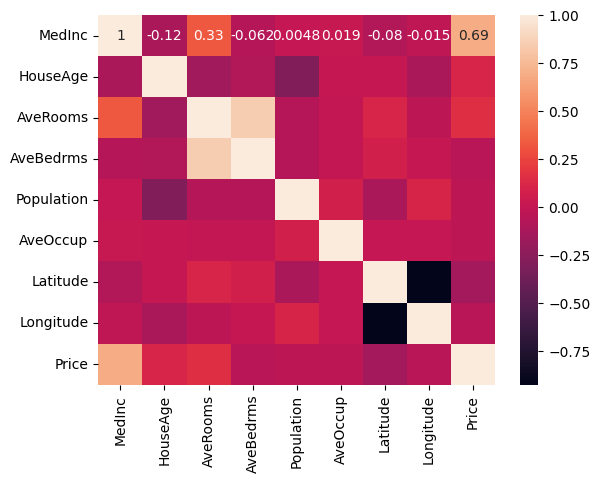

In [37]:
import seaborn as sns
sns.heatmap(dataset.corr(), annot = True)

In [45]:
# independent and dependent features
X = dataset.iloc[:, :-1] # Independent Feature
y = dataset.iloc[:, -1] # Dependent Feature

# Breaking Down dataset.iloc[:, :-1]
# : (before the comma): This selects all rows.
# :-1 (after the comma): This selects all columns except the last one

# Breaking Down dataset.iloc[:, -1]
# : (before the comma): Selects all rows.
# -1 (after the comma): Selects only the last column.

In [47]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X test scaled: ', X_train_scaled)
print('X test scaled: ', X_test_scaled)

X test scaled:  [[-0.72986836  1.22081889 -0.70305988 ...  0.05861244  0.96929441
  -1.43979718]
 [-0.61046678 -0.28439808  0.07828001 ...  0.13015917 -0.75823526
   1.08204942]
 [ 0.00784578 -0.60128586 -0.2447376  ... -0.09793279  0.94594941
  -1.2454256 ]
 ...
 [ 0.88684913 -1.78961504 -0.21300658 ...  0.09549475  0.78720344
  -1.10587678]
 [-0.87672223  0.50782138 -1.10043274 ...  0.18513096 -0.77224225
   0.66838683]
 [-0.62742573 -0.99739558 -0.60483749 ... -0.08418874  0.77786545
  -1.15073176]]
X test scaled:  [[ 0.75154854 -1.31428337 -0.39376169 ...  0.12606697 -0.68820027
   0.19491761]
 [ 0.05935857 -0.12595418 -0.33070668 ... -0.12021013  0.89459042
  -1.36503888]
 [ 0.34405687 -1.31428337 -0.41007104 ... -0.15581759 -0.91698123
   0.89764561]
 ...
 [ 0.36483158  0.27015554  0.04216837 ... -0.08014641 -0.46875731
  -0.43803598]
 [-0.90412152 -0.91817364  0.66736933 ... -0.10263685  2.51006411
  -1.96808915]
 [-0.43377577  1.22081889 -0.44835491 ...  0.2807072  -0.74422826


In [72]:
# Model training

In [59]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression

LinearRegression()

In [61]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
# Slopes
regression.coef_ # The coefficients (or weights) are the values that multiply the features to make the prediction.

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [65]:
# intercept
regression.intercept_ # The intercept (also called the bias) is the constant value that is added to the weighted sum of the features. It represents the predicted value when all features are zero

2.0634768086491184

In [67]:
# Prediction

y_pred = regression.predict(X_test_scaled)
print(y_pred)

[3.00397485 2.58011486 2.3489077  ... 3.09003708 0.79152007 2.04477012]


In [69]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Sqaured Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Sqaured Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Sqaured Error:  0.5522332399363616
Mean Absolute Error:  0.5371056943007961
Root Mean Sqaured Error:  0.7431239734636218


In [71]:
## R Sqaured and adjusted

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.5935958526436641


In [73]:
# adjusted R Square

adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(adjusted_r2)

0.5931179409607521


## Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

Serialization is the process of converting a Python object (such as a dictionary, list, or class instance) into a format that can be easily saved to a file or sent over a network. This allows the object to be preserved and later restored (deserialized) into its original form when needed.

In [75]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(regression, open('regressor.pkl', 'wb'))

# Purpose: Serializes a Python object and writes it to a file (or other writable stream).
# Function: pickle.dump(obj, file)
# obj: The Python object you want to serialize.
# file: The file-like object where the serialized data will be written.

In [77]:
model_regressor = pickle.load(open('regressor.pkl', 'rb'))

model_regressor.predict(X_test_scaled)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [79]:
standard_scaler = pickle.load(open('scaler.pkl', 'rb'))

model_regressor.predict(standard_scaler.transform(X_test))

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])